In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import scipy
import codecs

%matplotlib inline  
DEFAULT_DPI = 600
matplotlib.rcParams['figure.figsize'] = (15, 8)

from sklearn import linear_model
import numpy.ma as ma

## Input some data and run correlations

In [2]:
columns_to_drop = []

In [3]:
data = pd.read_csv('dataset_16', sep='\t', header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,10,43,5825543,69,60,0,1407606829,0,-24,вс,0,1414776005,-,424668,-,3
1,2,1,334,129,31,112227,2,1,1415699671,0,-29,пн,0,1386786500,86401,1274004,1415714518,21
2,2,1,1,5,5825543,315,25219,1,1415428541,0,-26,пн,0,1415612168,-,49380,-,16
3,1,1,422,2,5825543,392,44,1,1411245251,0,22,вс,0,1379156172,-,19752,-,20
4,1,1,0,580,7699829,500,161068,1,1354122839,0,26,вс,0,1415715882,3,5728080,1415715885,18


In [5]:
val_to_num = {'пн':1, 'вт':2, 'ср':3, 'чт':4, 'пт':5, 'сб':6, 'вс':7, '-':np.nan, '':np.nan}

ncols = 18
for i in range(ncols):
    data[i] = [val_to_num[s] if s in val_to_num.keys() else float(s) for s in data[i]]

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,1.0,10.0,43.0,5825543.0,69.0,60.0,0.0,1.407607e+09,0.0,-24.0,7,0.0,1.414776e+09,NaN,424668.0,NaN,3.0
1,2.0,1.0,334.0,129.0,31.0,112227.0,2.0,1.0,1.415700e+09,0.0,-29.0,1,0.0,1.386786e+09,86401.0,1274004.0,1.415715e+09,21.0
2,2.0,1.0,1.0,5.0,5825543.0,315.0,25219.0,1.0,1.415429e+09,0.0,-26.0,1,0.0,1.415612e+09,NaN,49380.0,NaN,16.0
3,1.0,1.0,422.0,2.0,5825543.0,392.0,44.0,1.0,1.411245e+09,0.0,22.0,7,0.0,1.379156e+09,NaN,19752.0,NaN,20.0
4,1.0,1.0,0.0,580.0,7699829.0,500.0,161068.0,1.0,1.354123e+09,0.0,26.0,7,0.0,1.415716e+09,3.0,5728080.0,1.415716e+09,18.0


In [7]:
data = np.array(data)

In [23]:
dataT = data.T

for i in range(ncols):
    for j in range(i+1, ncols):
        ind = (~np.isnan(dataT[i])) * (~np.isnan(dataT[j]))
        corr = np.corrcoef(dataT[i, ind], dataT[j, ind])[0, 1]
        if np.isnan(corr):
            print(i, j, ' nan')
        elif np.abs(corr) > 0.5:
            print(i, j, corr)

0 1  nan
1 2  nan
1 3  nan
1 4  nan
1 5  nan
1 6  nan
1 7  nan
1 8  nan
1 9  nan
1 10  nan
1 11  nan
1 12  nan
1 13  nan
1 14  nan
1 15  nan
1 16  nan
1 17  nan
2 12  nan
2 13 -0.999997857874
2 14 0.534301445474
3 15 1.0
7 14  nan
7 16  nan
12 13 -0.569396648868
12 16  nan


/usr/local/Cellar/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/Cellar/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [60]:
def get_info(i, no_pic=True):
    ind = ~np.isnan(dataT[i])
    tmp = dataT[i, ind]
    print('nans_num ', 1000 - ind.sum())
    print('min      ', tmp.min())
    print('mean     ', tmp.mean())
    print('max      ', tmp.max())
    print('norm_std ', ((tmp - tmp.min()) / (tmp.max() - tmp.min())).std())
    if len(np.unique(tmp)) < 20:
        print('Small amount of unique values: ', np.unique(tmp, return_counts=True))
    if not no_pic:
        seaborn.distplot(tmp)

In [28]:
def scatter(i, j):
    ind = (~np.isnan(dataT[i])) * (~np.isnan(dataT[j]))
    seaborn.regplot(dataT[i, ind], dataT[j, ind], fit_reg=False)

In [61]:
get_info(1)

nans_num  0
min       1.0
mean      1.0
max       1.0
norm_std  nan
Small amount of unique values:  (array([ 1.]), array([1000]))


/usr/local/Cellar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [25]:
columns_to_drop.append(1)

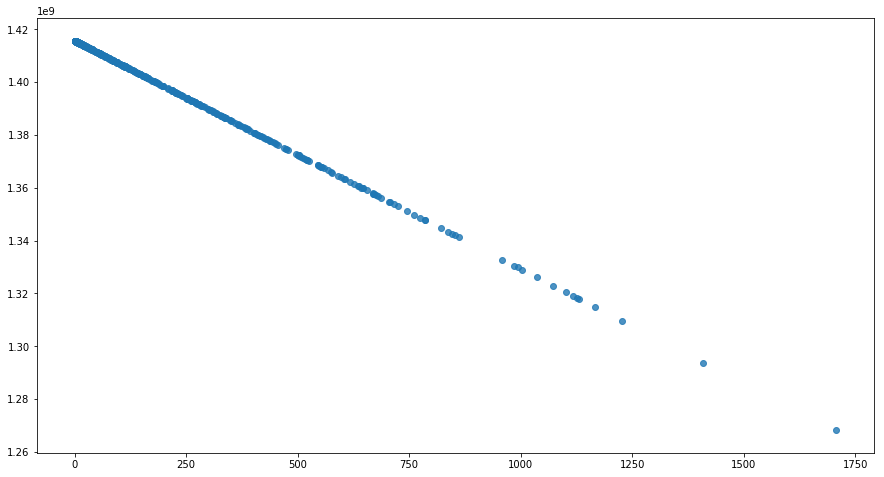

In [45]:
scatter(2, 13)

In [62]:
get_info(2)

nans_num  33
min       0.0
mean      114.802481903
max       1706.0
norm_std  0.125607137833


In [63]:
get_info(13)

nans_num  0
min       0.0
mean      1359364164.61
max       1415739293.0
norm_std  0.177842609045


Столбцы 2 и 13 очень сильно коррелируют, при этом в 13-ом столбце отсутствуют неизвестные значения, так что удалим второй столбец, тогда заодно и не придется разбираться с тем, что у него непонятная корреляцию с 12-м столбцом.

In [48]:
columns_to_drop.append(2)

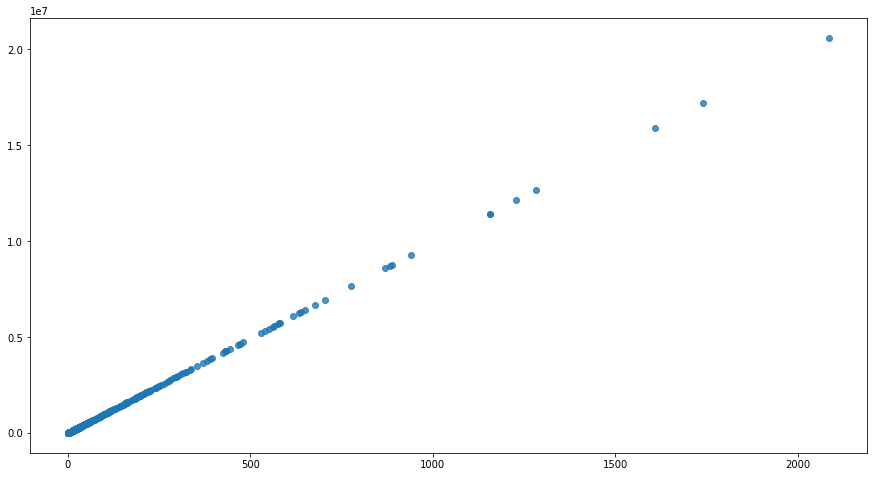

In [49]:
scatter(3, 15)

Видим, что столбцы 3 и 15 идентичны по модулю масштаба. Удалим тот, у которого больше пропусков.

In [64]:
get_info(3)

nans_num  0
min       1.0
mean      57.329
max       2086.0
norm_std  0.0801853616287


In [65]:
get_info(15)

nans_num  1
min       9876.0
mean      565265.069069
max       20601336.0
norm_std  0.0802131466629


In [66]:
columns_to_drop.append(15)

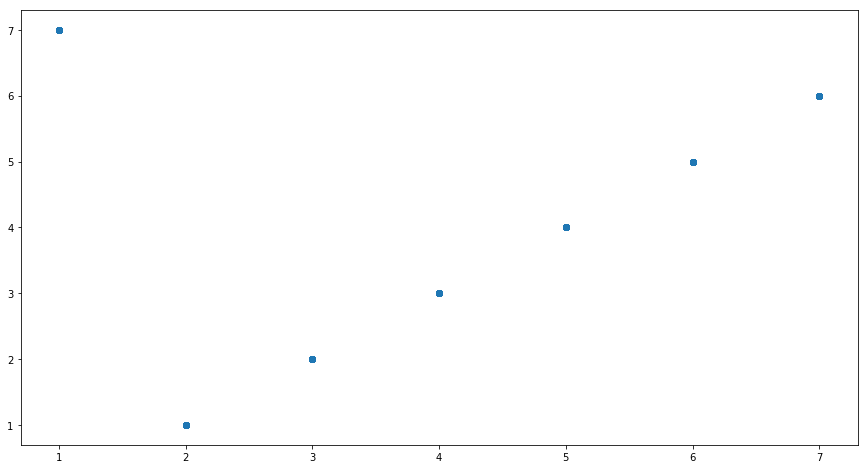

In [68]:
scatter(0, 11)

Видим, что все точки собрались в кучки, что значит, что в нулевом столбце числа описывают дни недели, но начиная с воскресенья.

In [69]:
columns_to_drop.append(0)

In [72]:
get_info(7)

nans_num  0
min       0.0
mean      0.999
max       1.0
norm_std  0.0316069612586
Small amount of unique values:  (array([ 0.,  1.]), array([  1, 999]))


В седьмом столбце только одно значение из всех равно нулю. Вряд ли именно оно определяет мошенников, скорее похоже на баг, удалим:

In [73]:
columns_to_drop.append(7)

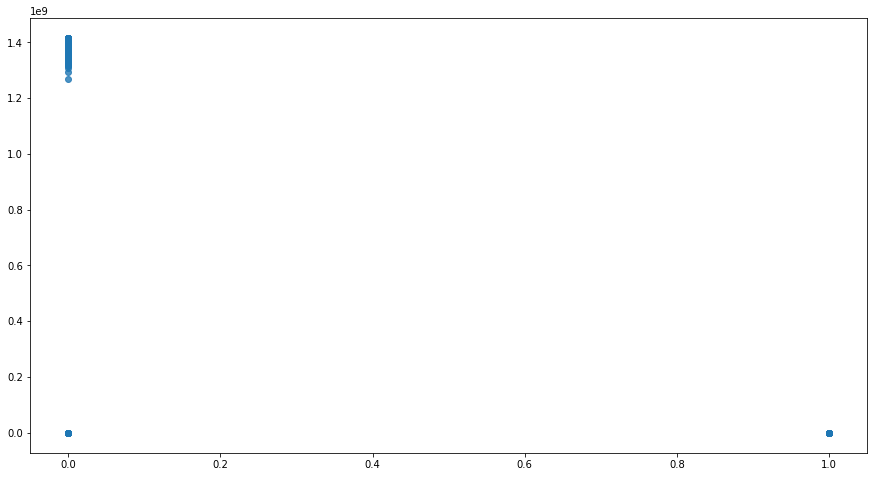

In [74]:
scatter(12, 13)

In [81]:
get_info(12)

nans_num  0
min       0.0
mean      0.011
max       1.0
norm_std  0.104302444842
Small amount of unique values:  (array([ 0.,  1.]), array([989,  11]))


In [83]:
get_info(13)

nans_num  0
min       0.0
mean      1359364164.61
max       1415739293.0
norm_std  0.177842609045


nans_num  783
min       1415653371.0
mean      1415699265.16
max       1415738278.0
norm_std  0.269303867876


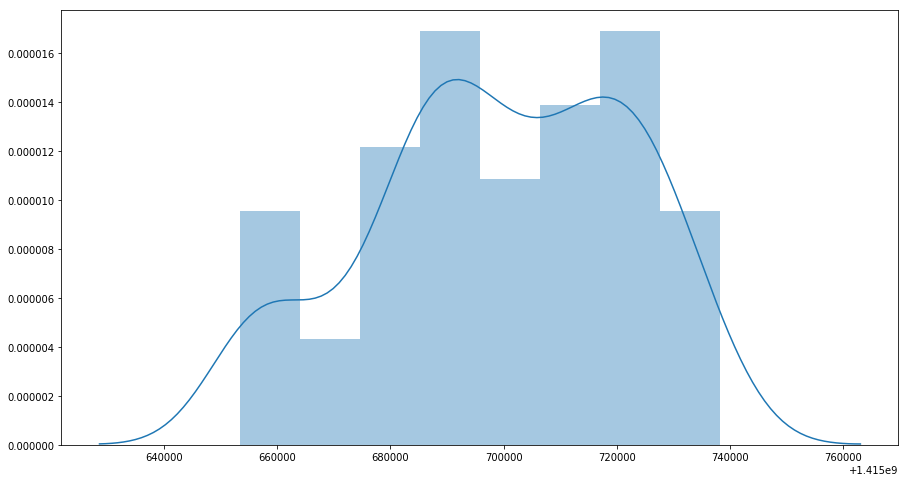

In [84]:
get_info(16, no_pic=False)

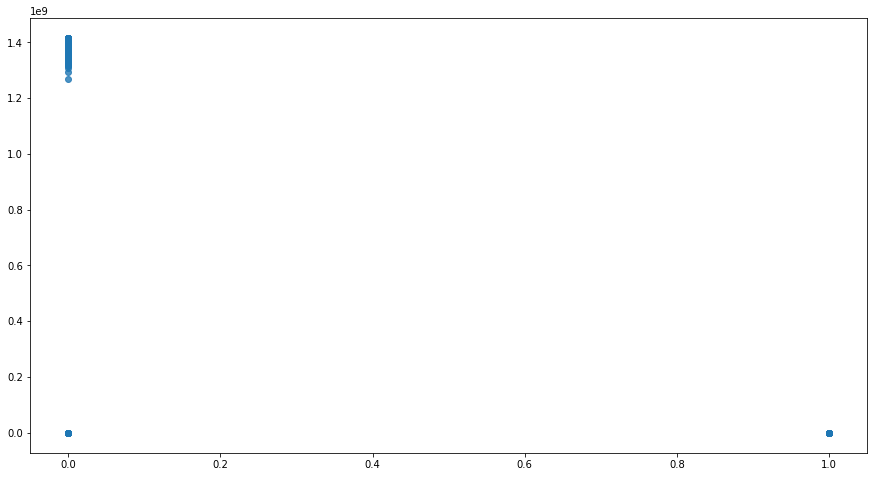

In [87]:
scatter(12, 13)

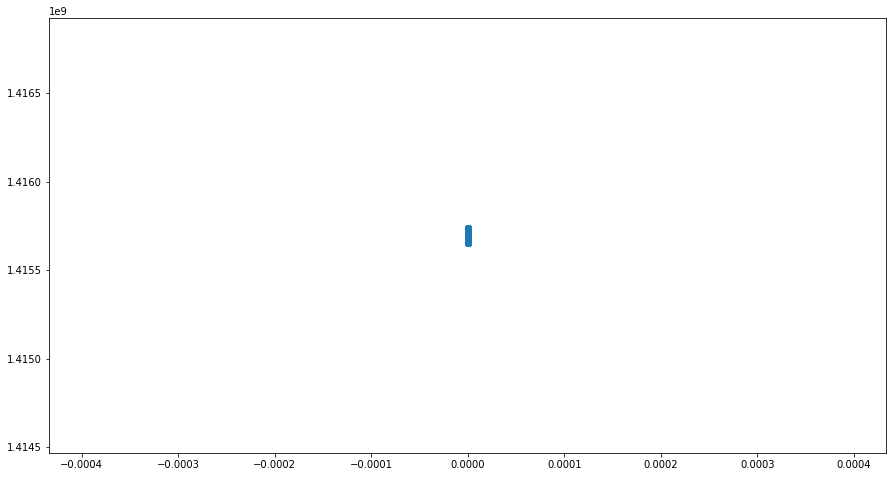

In [88]:
scatter(12, 16)

Не очень понятно, что происходит в этих данных, пока оставим как есть.

In [89]:
columns_to_drop

[1, 2, 15, 0, 7]

## Run PCA to see if we can exclude some cols

In [108]:
# https://www.clear.rice.edu/comp130/12spring/pca/pca_docs.shtml

from matplotlib.mlab import PCA

# delete cols with no variance
data2 = np.nan_to_num(scipy.delete(data,columns_to_drop,1))

# run PCA
pca1 = PCA(data2)

# % of explained variance
print("Explained variance")
for d in pca1.fracs:
    print(d)

# first eigenvector
print("\n\nCoords of first eigenvector")
for i, d in enumerate(pca1.Wt[0]):
    print(i, '\t', d)

Explained variance
0.160595197044
0.123804417643
0.115992645542
0.103743801385
0.0804003603811
0.0775473180541
0.0748040690302
0.0714848054509
0.0527040330249
0.047003070454
0.0392045221423
0.0321536648073
0.0205620950416


Coords of first eigenvector
0 	 0.467598406539
1 	 -0.0738318300296
2 	 -0.0588024626249
3 	 -0.0779102209513
4 	 -0.0933071789809
5 	 -0.0331748710122
6 	 0.135624767743
7 	 0.00752813766881
8 	 -0.0911789494899
9 	 0.130730697004
10 	 0.598075618169
11 	 0.593998096951
12 	 0.0467226555314


First eigenvector doesn't explain much variance (16% of total variance).

If we decide that 16% of variance is ok for us, we could drop all other columns.

(Remember that column #1 in original data was dropped before PCA, and column numbers are currently shifted!)